In [1]:
# Затем создаем соединение с БД. Чтобы посмотреть необходимые данные для подключения необходимо зайти в настройке вашего субд. 
# Если вы использовали PostgreSQL, данные можно посмотреть открыв SQL Shell на вашем компьютере.
# Данные для подлючения будут показаны после нескольких нажатий на enter.
import psycopg2 # это драйвер для postgresql
import getpass # это функция, которая скрывает пароль, можно не вводить данную функцию, 
# тогда в строке password вам необходимо указать свой пароль от базы данных 
conn=psycopg2.connect(user = 'postgres',
                     database = 'postgres',
                     host = 'localhost',
                     port = '5432',
                     password = getpass.getpass('Insert password: '))
# Проверяем подлючение
print(conn.get_dsn_parameters()) 

Insert password: ········
{'user': 'postgres', 'dbname': 'postgres', 'host': 'localhost', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


In [19]:
# Для того, чтобы обратиться к БД за данными необходимо установить пакет pandas.
# Создаем таблицу для отчета "Распределение установленных рейтингов агенством Эксперт РА в 2014 году". 
# Таблица придумана рандомная. 
import pandas as pd
query="SELECT \"grade\", count(\"ent_name\") as quantity FROM ratings_task WHERE data >= '01.01.2014' AND data <= '31.12.2014' AND agency_id = 'EXP' GROUP BY \"grade\" ORDER BY \"grade\";"
ratings=pd.read_sql_query(query,conn)
ratings

,grade,quantity
0,A,395
1,A.mfi,17
2,A+,178
3,A+.mfi,12
4,A++,84
5,A++.mfi,4
6,B,6
7,B+,17
8,B++,95
9,B++.mfi,2


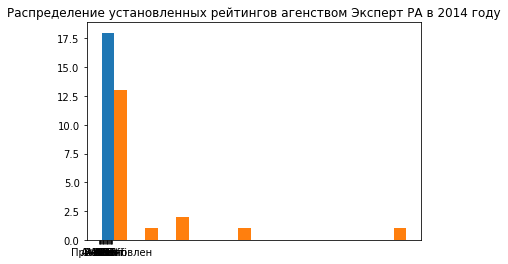

<Figure size 432x288 with 0 Axes>

In [22]:
# Создаем график для отчета. График тоже сделан рандомный, не из прошлых ДЗ, чтобы показать как выгружать и формировать отчет. 
# Сначала необходимо скачать библиотеки для построения графика.
import matplotlib as plt
import matplotlib.pyplot as plt
ratings.T
plt.hist(ratings.values)
plt.title('Распределение установленных рейтингов агенством Эксперт РА в 2014 году')
plt.show()

# Сохраняем картинку в рабочую диреткорию
plt.savefig('ratings.png')

In [23]:
# Перед генерацией отчета устанавливаем все необходимые библитеки
from __future__ import print_function
from jinja2 import Environment, FileSystemLoader
from weasyprint import HTML, Document
import os

# Далее генирируем отчет
env = Environment(loader=FileSystemLoader('.'))
template = env.get_template("myreport.html") # Шаблон предварительно был загружен в директорию
template_vars = {"title": "Отчет: составила Афонина Юлия",
                 "INTRO": "В документа расположена таблица и график, иллюстрирующие распределение рейтингов, установленных агенством Эксперт РА в 2014 году",
                 "TABLE_DESC": "В таблице показано распределение рейтингов, выставленных компаниям агенством Эксперт РА в 2014 году. В столбце  grade приведен рейтинг, в столбце quantity приведено кол-во компаний, которым был присвоен данный рейтинг.",
                 "TABLE": ratings.to_html(), 
                 "IMAGE_DESC": "Рисунок иллюстрирует распределение установленных рейтингов агенством Эксперт РА в 2014 году", 
                 "IMAGE": os.path.realpath('ratings.png') # Рисунок был предварительно сохранен в рабочую директорию выше
                }

# Формируем отчет в формате pdf
html_out = template.render(template_vars, presentational_hints=True)
HTML(string=html_out).write_pdf('Отчет по рейтингам Эксперт РА.pdf', presentational_hints=True)

ModuleNotFoundError: No module named 'weasyprint'